**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**




1.  PTT
2.  AOT
3.  KBANK
4.  CPALL
5.  ADVANC



---


**Here, you will use only the data from 2016-01-01 to 2020-12-31




In [2]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%mathplotlib inline
%config InlineBackend.figure_format='retina'

UsageError: Line magic function `%mathplotlib` not found.


In [4]:
df = data.DataReader('ADVANC.bk', data_source="yahoo", 
start='2016-01-01', 
end='2020-12-31')
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,149.5,141.0,149.0,143.0,24880200.0,115.078918
2016-01-05,144.5,131.0,144.0,131.0,59681500.0,105.421974
2016-01-06,139.0,128.0,128.5,137.5,59203500.0,110.652824
2016-01-07,138.0,131.5,133.0,134.5,32742400.0,108.238594
2016-01-08,144.0,135.0,137.0,144.0,26585900.0,115.883698


Text(0, 0.5, 'Difference in Change')

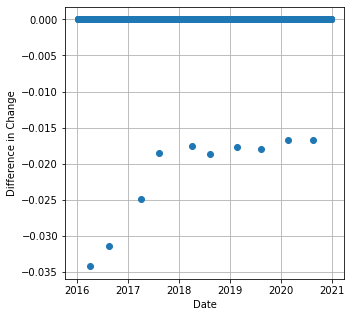

In [13]:

adj_close = df['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = df['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(5,5))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [6]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-03-31
2016-08-15
2017-04-05
2017-08-07
2018-04-05
2018-08-15
2019-02-20
2019-08-16
2020-02-19
2020-08-19


In [7]:
dividends =[]
for date in delta.index:
  k = np.nonzero(df.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-03-31    6.471861
2016-08-15    5.799403
2017-04-05    4.322589
2017-08-07    3.472139
2018-04-05    3.544272
2018-08-15    3.727608
2019-02-20    3.250543
2019-08-16    3.882942
2020-02-19    3.569505
2020-08-19    3.209796
dtype: float64


In [8]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    12.271264
2017     7.794728
2018     7.271880
2019     7.133484
2020     6.779301
dtype: float64
Dividend growth rate: 
2017   -0.364798
2018   -0.067077
2019   -0.019032
2020   -0.049651
dtype: float64
Dividends growth rate is -5.836396772718261 %.


In [12]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_ADVANC = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current ADVANC stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, ADVANC Stock price is {S_ADVANC}.")

The current ADVANC stock price is 176.0.
From the Discounted Cash Flow model, ADVANC Stock price is 42.808356107563114.
